# Grocers

## Background

The deal team wants to understand the gourmet grocery space a bit better, specifically focusing on a handful of companies (Whole Foods, Sprouts, Natural Grocer, Fresh Thyme, Fresh Market, and Earth Fare). You are given access to a geolocation dataset which tracks cell phone pings when customers enter a gourmet grocery store.  Please use this data to answer the following questions and to make a sole recommendation of which grocery store brand is your top pick for an investment (assume all of them have the same revenue, financials, and purchase price). 
Data frequency for the geolocation data is daily from 9/10/2015 to 11/16/2020. The demographics file is a snapshot as of October 2020. 

From the problem description:

- 'devices_store': number of tracked devices that went into a particular store on a particular date
- 'devices': number of devices being tracked across the entire country on a particular date; also known as the “panel size”
- 'Id': grocery store id (used to link device counts and demographics)
- 'Address': grocery store address
- 'Income_avg': average income in USD of visitors to the store
- 'Age': average age of visitors to the store


## Submission Requirements

Write your code in Python (either script or jupyter notebook is acceptable). Answer the questions below and show your output in Excel. Submit both your code and excel output prior to the case study deadline. 

 ### Starting analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 999)

In [2]:
path = 'data/grocers_t2_CS1.csv'
device = pd.read_csv(path, encoding='utf-8', header=0, sep=',', decimal=",", index_col=0);

device['day'] = device['day'].astype('datetime64[ns]')
#device['Store Name'] = device['Store Name'].astype('category')
#device['Retailer'] = device['Retailer'].astype('category')
device = device.rename(columns = {'day': 'date', 'Store Name': 'store_name', 'Address': 'address', 'Retailer': 'retailer', 'id': 'id_store'});

print("device.shape: {}".format(device.shape))
#for column in device.columns:
#   print("Does column \'{:<13}\' have any NaN? {}".format(column, device[column].isnull().any()))

#device.describe().transpose()
#device.describe(include = 'object').transpose()

/home/ktellicio/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


device.shape: (2167810, 7)


In [3]:
path = 'data/grocers_demographics.xlsx'
demo = pd.read_excel(path,engine='openpyxl')

#demo['ticker'] = demo['ticker'].astype('category')
demo = demo.rename(columns = {'ticker': 'retailer', 'Address': 'address', 'Retailer': 'retailer'});

print("demo.shape: {}".format(demo.shape))
#for column in demo.columns:
#    print("Does column \'{:<13}\' have any NaN? {}".format(column, demo[column].isnull().any()))

#demo.describe().transpose()
#demo.describe(include = 'object').transpose()

demo.shape: (1264, 10)


In [4]:
print("device: ")
print(device.dtypes, '\n')
print("demo: ")
print(demo.dtypes)

device: 
date             datetime64[ns]
devices_store             int64
devices                   int64
store_name               object
id_store                  int64
address                  object
retailer                 object
dtype: object 

demo: 
month            datetime64[ns]
retailer                 object
id_store                  int64
income_avg                int64
income_25pct              int64
income_median             int64
income_75pct              int64
age                     float64
male                    float64
female                  float64
dtype: object


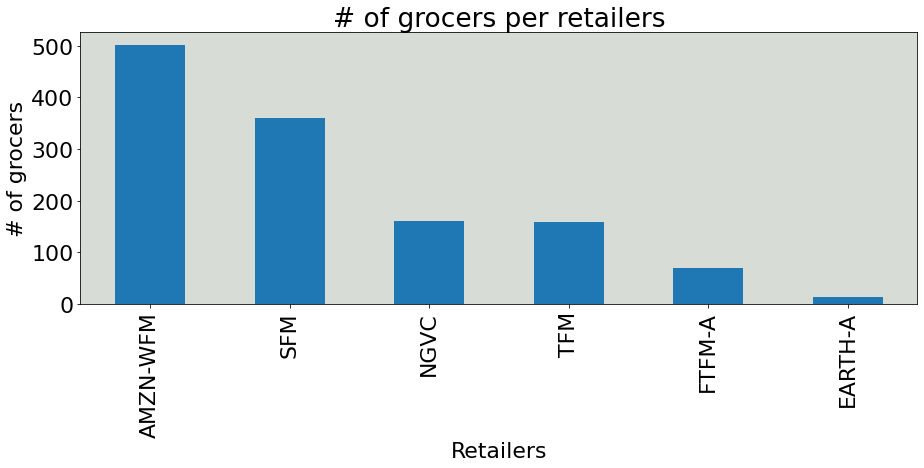

In [5]:
plt.rcParams.update({'font.size': 22});
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('# of grocers per retailers')
ax.set_xlabel('Retailers')
ax.set_ylabel('# of grocers')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

demo['retailer'].value_counts().plot(kind='bar', ax=ax);

## Evaluation and Questions  

    1. Aggregate the cell phone device data to determine the total quarterly traffic for each store for 1Q18 through 4Q20 (1Q18 == 1/1/2018 through 3/31/2018). 
        a. “Traffic” is defined as devices_store / devices for the time-period in question.
        b. Should the “devices_store” and “devices” columns be summed or averaged?
        c. The “devices” column represents the panel size (# of cell phones tracked that day) and grows significantly throughout the dataset. Please use the panel size to normalize/adjust the traffic so that the data is comparable across time.

In [6]:
traffic = device[(device['date'].dt.year == 2018)].sort_values('date')
traffic = traffic.groupby(['id_store','retailer', device['date'].dt.to_period('Q')])
traffic = traffic.agg(
    tot_devices=('devices', sum),
    tot_devices_store=('devices_store', sum),
)
traffic = traffic.reset_index(inplace=False)
                       
traffic['traffic (e-7)'] = traffic['tot_devices_store']*10000000 / traffic['tot_devices']

    2. For each grocer, which store location has the highest traffic and which store has the lowest traffic each quarter?

In [7]:
traffic = device[(device['date'].dt.year == 2018)].sort_values('date')
traffic = traffic.groupby(['id_store','retailer', device['date'].dt.to_period('Q')])
traffic = traffic.agg(
    tot_devices=('devices', sum),
    tot_devices_store=('devices_store', sum),
)
traffic = traffic.reset_index(inplace=False)
                       
traffic['traffic (e-7)'] = traffic['tot_devices_store']*10000000 / traffic['tot_devices']


quarters = traffic.date.unique()
retailers = traffic['retailer'].value_counts().index
quest2 = pd.DataFrame(columns = quarters)

for i in retailers:
    retailer_data = traffic[traffic['retailer'] == i]
    retailer_data = retailer_data[['id_store', 'date', 'traffic (e-7)']].set_index(['id_store', 'date']).unstack().droplevel(level=0, axis=1)

    for j in quarters:
        quest2[j] = [retailer_data[j].idxmax(),retailer_data[j].idxmin()]
    quest2.index = ['Max','Min']
    print('{} stores with max. and min. traffic): '.format(i))
    print(quest2)
    print('\n')

Whole Foods Market stores with max. and min. traffic): 
      2018Q1   2018Q2   2018Q3   2018Q4
Max  4231235  4231235  4231235  4231235
Min  4653413  5181986  5181992  5181993


Sprouts Farmers Market stores with max. and min. traffic): 
      2018Q1   2018Q2   2018Q3   2018Q4
Max  5586491  5586491  5586491  5586491
Min  4775067  5030446  5030446  5586483


naturalgrocer stores with max. and min. traffic): 
      2018Q1   2018Q2   2018Q3   2018Q4
Max  5175337  5175337  5175337  5175337
Min  5175335  4775690  4677081  5610144


Freshmarket stores with max. and min. traffic): 
      2018Q1   2018Q2   2018Q3   2018Q4
Max  3838593  3838593  3838593  3838593
Min   911487   911487   911487   911347


Freshthyme stores with max. and min. traffic): 
      2018Q1   2018Q2   2018Q3   2018Q4
Max  5610119  5610119  5610125  5610125
Min  5610058  5610059  5610059  5610059


EARTHFARE stores with max. and min. traffic): 
      2018Q1   2018Q2   2018Q3   2018Q4
Max  5610023  5610023  5610023  5610023

    3. Calculate the quarterly year-over-year growth (e.g. 1Q19 vs. 1Q18 % growth) in device traffic for each store for 1Q19 through 4Q20.

In [59]:
traffic = device[(device['date'].dt.year >= 2018) & (device['date'].dt.year <= 2020)].sort_values('date')
traffic = traffic.groupby(['id_store','retailer', device['date'].dt.to_period('Q')])
traffic = traffic.agg(
    tot_devices=('devices', sum),
    tot_devices_store=('devices_store', sum))
traffic = traffic.reset_index(inplace=False)
                       
traffic['traffic (e-7)'] = traffic['tot_devices_store']*10000000 / traffic['tot_devices']
quest3 = traffic[['id_store', 'date', 'traffic (e-7)']].set_index(['id_store', 'date']).unstack().droplevel(level=0, axis=1)

In [60]:
growth = pd.DataFrame()

for i in range(18,20):
    for j in range(1,5):
        q_before = '20{}Q{}'.format(i, j)
        q_after  = '20{}Q{}'.format(i+1, j)
        growth[pd.Period(value=q_after)] = quest3[q_after] / quest3[q_before]
growth

2019Q1    2019Q2    2019Q3    2019Q4    2020Q1    2020Q2  \
id_store                                                               
766391    0.593460  0.725512  0.962964  0.838711  1.098683  0.659578   
766392    0.793782  0.850669  0.855904  0.712756  0.774609  0.660891   
766393    0.965719  0.840402  0.923935  0.740551  0.706752  0.600015   
766394    0.966549  0.945529  0.921564  0.669312  0.780307  0.659364   
766396    0.830880  0.800406  0.784753  0.803209  0.772892  0.800514   
...            ...       ...       ...       ...       ...       ...   
5610149   0.810009  0.602480  0.827871  0.640699  0.630537  0.875365   
5610150   0.660523  0.722930  0.817718  0.898855  0.511928  0.361286   
5610151   0.687981  0.852624  0.974107  0.790338  0.824891  0.537691   
5610152   0.497855  0.682162  1.679407  1.526511  1.104772  0.767165   
5610153   0.976116  0.793140  0.742921  0.991416  0.741399  1.061360   

            2020Q3    2020Q4  
id_store                      
766391    0.761684  0.858923  
766392    0.827712  1.135572  
766393    0.542762  0.615443  
766394    0.624335  0.854825  
766396    0.958899  0.975695  
...            ...       ...  
5610149   0.874269  1.139386  
5610150   0.373786  1.078270  
5610151   0.689177  5.090208  
5610152   0.514771  1.922037  
5610153   2.957275  2.496460  

[1264 rows x 8 columns]

For each grocer, which store had the highest growth?

In [61]:
traffic = device[(device['date'].dt.year >= 2018) & (device['date'].dt.year <= 2020)].sort_values('date')
traffic = traffic.groupby(['id_store','retailer', device['date'].dt.to_period('Q')])
traffic = traffic.agg(
    tot_devices=('devices', sum),
    tot_devices_store=('devices_store', sum))
traffic = traffic.reset_index(inplace=False)
                       
traffic['traffic (e-7)'] = traffic['tot_devices_store']*10000000 / traffic['tot_devices']

traffic_growth = traffic[traffic['date'].dt.year > 2018].copy().reset_index(drop=True)
traffic_growth.insert(1, "growth", "")

for i in range(len(traffic_growth)):
    quarter = traffic_growth.loc[i]["date"]
    id_store = traffic_growth.loc[i]['id_store']
    g = growth.loc[id_store, quarter]
    traffic_growth.iloc[i, traffic_growth.columns.get_loc('growth')] = g
traffic_growth

id_store    growth            retailer    date  tot_devices  \
0        766391   0.59346       naturalgrocer  2019Q1    723045572   
1        766391  0.725512       naturalgrocer  2019Q2    804842627   
2        766391  0.962964       naturalgrocer  2019Q3    930037075   
3        766391  0.838711       naturalgrocer  2019Q4    965594764   
4        766391   1.09868       naturalgrocer  2020Q1   1025638758   
...         ...       ...                 ...     ...          ...   
10106   5610153  0.991416  Whole Foods Market  2019Q4    911945865   
10107   5610153  0.741399  Whole Foods Market  2020Q1    890957260   
10108   5610153   1.06136  Whole Foods Market  2020Q2    828454547   
10109   5610153   2.95728  Whole Foods Market  2020Q3    987381071   
10110   5610153   2.49646  Whole Foods Market  2020Q4    517319799   

       tot_devices_store  traffic (e-7)  
0                    342       4.729992  
1                    455       5.653279  
2                    466       5.010553  
3                    479       4.960673  
4                    533       5.196761  
...                  ...            ...  
10106                334       3.662498  
10107                226       2.536598  
10108                254       3.065950  
10109                831       8.416203  
10110                473       9.143280  

[10111 rows x 7 columns]

In [62]:
quarters = traffic_growth.date.unique()
retailers = traffic_growth['retailer'].value_counts().index
quest3 = pd.DataFrame(columns = quarters)

for i in retailers:
    retailer_data = traffic_growth[traffic_growth['retailer'] ==  i]
    retailer_data = retailer_data[['id_store', 'date', 'growth']]
    retailer_data = retailer_data.set_index(['id_store', 'date']).unstack().droplevel(level=0, axis=1)
    retailer_data = retailer_data.astype('float64', copy=False)
    
    for j in quarters:
        quest3[j] = [retailer_data[j].idxmax(),retailer_data[j].idxmin()]
    quest3.index = ['Max','Min']
    print('{} stores with max. and min. growth: '.format(i))
    print(quest3)
    print('\n')

Whole Foods Market stores with max. and min. growth: 
      2019Q1   2019Q2   2019Q3   2019Q4   2020Q1   2020Q2   2020Q3   2020Q4
Max  4653413  4973614  4973606  5181993  5181993  5610137  5610132  5610133
Min  5610136  5610136  5610136  5610136  4231587  4231472  4231643  4231599


Sprouts Farmers Market stores with max. and min. growth: 
      2019Q1   2019Q2   2019Q3   2019Q4   2020Q1   2020Q2   2020Q3   2020Q4
Max  4775070  4775070  5030446  5030442  5030438  5156149  5156149  5586485
Min  5030445  5030445  5156150  5156148   889246   889165  4680471  4680471


naturalgrocer stores with max. and min. growth: 
      2019Q1   2019Q2   2019Q3   2019Q4   2020Q1   2020Q2   2020Q3   2020Q4
Max  4677080  4677079  5020791  5175335  5175335  5175334  5175334  5610145
Min  5020791  5020790   766428   766428   766428   766428  3760655   766422


Freshmarket stores with max. and min. growth: 
     2019Q1  2019Q2  2019Q3   2019Q4   2020Q1   2020Q2   2020Q3  2020Q4
Max  911438  911426  911444  3

    4. How many stores does each grocer have per state? 
        a. Use the Address column (column G) to determine the state of each grocery.

In [63]:
states = device.copy().reset_index(drop=True)

st = []
add = list(states['address'])

for i in range(len(add)): 
    XX = add[i].split(' ')[-2]
    st.append(XX)
states['state'] = pd.DataFrame(st)[0]

quest4 = states.groupby(['retailer','state']).agg(
    count=('date', "count"))
quest4 = quest4.unstack().droplevel(level=0, axis=1).fillna(0)
quest4

state                        AL      AR       AZ        CA       CO       CT  \
retailer                                                                       
EARTHFARE                   0.0     0.0      0.0       0.0      0.0      0.0   
Freshmarket             12648.0  3708.0      0.0       0.0      0.0   5187.0   
Freshthyme                  0.0     0.0      0.0       0.0      0.0      0.0   
Sprouts Farmers Market   5550.0     0.0  69799.0  218240.0  56526.0      0.0   
Whole Foods Market       7312.0  3629.0  18504.0  163509.0  37398.0  15298.0   
naturalgrocer               0.0  5198.0  20117.0       0.0  65512.0      0.0   

state                        DC      DE       FL       GA      HI      IA  \
retailer                                                                    
EARTHFARE                   0.0     0.0   1741.0   1804.0     0.0     0.0   
Freshmarket                 0.0  1740.0  81913.0  21611.0     0.0     0.0   
Freshthyme                  0.0     0.0      0.0      0.0     0.0  3190.0   
Sprouts Farmers Market      0.0  1703.0  29491.0  27391.0     0.0     0.0   
Whole Foods Market      10387.0     0.0  56538.0  20572.0  7522.0  1890.0   
naturalgrocer               0.0     0.0      0.0      0.0     0.0  8529.0   

state                       ID       IL       IN       KS      KY       LA  \
retailer                                                                     
EARTHFARE                  0.0      0.0      0.0      0.0     0.0      0.0   
Freshmarket                0.0   7237.0   7339.0      0.0  3636.0   9069.0   
Freshthyme                 0.0  17040.0  26454.0      0.0  1797.0      0.0   
Sprouts Farmers Market     0.0      0.0      0.0   8770.0     0.0   1068.0   
Whole Foods Market      1864.0  50174.0   8874.0   5501.0  3390.0  12814.0   
naturalgrocer           6742.0      0.0      0.0  13897.0     0.0   1587.0   

state                        MA       MD      ME       MI       MN      MO  \
retailer                                                                     
EARTHFARE                   0.0      0.0     0.0   1759.0      0.0     0.0   
Freshmarket              1793.0   7318.0     0.0      0.0      0.0     0.0   
Freshthyme                  0.0      0.0     0.0  15834.0  14268.0  8271.0   
Sprouts Farmers Market      0.0   6708.0     0.0      0.0      0.0  5491.0   
Whole Foods Market      57484.0  17141.0  1868.0  12437.0  12461.0  6791.0   
naturalgrocer               0.0      0.0     0.0      0.0   1789.0  8263.0   

state                       MS      MT       NC      ND      NE      NH  \
retailer                                                                  
EARTHFARE                  0.0     0.0   5261.0     0.0     0.0     0.0   
Freshmarket             1878.0     0.0  36980.0     0.0     0.0     0.0   
Freshthyme                 0.0     0.0      0.0     0.0     0.0     0.0   
Sprouts Farmers Market     0.0     0.0   6444.0     0.0     0.0     0.0   
Whole Foods Market      1869.0     0.0  26785.0     0.0  3723.0  3267.0   
naturalgrocer              0.0  6895.0      0.0  4917.0  5379.0     0.0   

state                        NJ       NM       NV       NY       OH       OK  \
retailer                                                                       
EARTHFARE                   0.0      0.0      0.0      0.0      0.0      0.0   
Freshmarket              3336.0      0.0      0.0   6986.0   7140.0   1701.0   
Freshthyme                  0.0      0.0      0.0      0.0  16654.0      0.0   
Sprouts Farmers Market   1652.0  15901.0  19816.0      0.0      0.0  19361.0   
Whole Foods Market      37427.0   5613.0   9413.0  42319.0  20094.0   5610.0   
naturalgrocer               0.0   8968.0   5195.0      0.0      0.0  10331.0   

state                        OR       PA      RI       SC       TN       TX  \
retailer                                                                      
EARTHFARE                   0.0      0.0     0.0   9036.0      0.0      0.0   
Freshmarket  

    5. For each grocer, which state had the highest growth from 4Q19 to 4Q20 in terms of:
        a. # of stores.
        b. Average # of devices visiting a store.

In [64]:
idx = (((device['date'].dt.year >= 2018) & (device['date'].dt.month >= 10)) | (device['date'].dt.year >= 2019))
states = device[idx].copy().reset_index(drop=True)

st = []
add = list(states['address'])

for i in range(len(add)): 
    XX = add[i].split(' ')[-2]
    st.append(XX)
states['state'] = pd.DataFrame(st)[0]

In [85]:
growth_store = states.groupby(['retailer','state', states['date'].dt.to_period('Q')])
growth_store = growth_store.agg(
    num_stores = ('id_store', "count"),
    tot_devices = ('devices', sum),
    tot_devices_store=('devices_store', sum))

#growth_store = growth_store.reset_index(inplace=False)

growth_store['traffic (e-7)'] = growth_store['tot_devices_store']*10000000 / growth_store['tot_devices']
growth_store.insert(1, "growth", "")

growth_store = growth_store.fillna(0)

In [86]:
growth = pd.DataFrame()

growth_store_state = growth_store.groupby(['retailer','state', 'date']).agg(
    count=('num_stores', sum))
growth_store_state = growth_store_state.unstack().droplevel(level=0, axis=1)

for i in range(18,20):
    for j in range(1,5):
        if((i == 18) & (j < 4)):
            continue
        q_before = '20{}Q{}'.format(i, j)
        q_after  = '20{}Q{}'.format(i+1, j)
        bef = growth_store_state[q_before]
        aft = growth_store_state[q_after]
        growth[pd.Period(value=q_after)] = aft / bef

2019Q4    2020Q1    2020Q2    2020Q3    2020Q4
retailer      state                                                  
EARTHFARE     FL     1.000000  1.011111  0.989011  1.000000  0.516484
              GA     1.010989  0.977778  0.846154  0.989130  0.510870
              MI     1.010989  0.877778  0.395604  0.815217  0.510870
              NC     1.011029  0.903704  0.560440  0.971014  0.512727
              SC     0.997817  0.968889  0.751648  0.912854  0.514223
...                       ...       ...       ...       ...       ...
naturalgrocer OR     1.075149  1.082545  1.046492  1.021987  0.513106
              TX     1.022130  1.022222  0.993554  0.979074  0.515111
              UT     0.952986  0.969231  0.925599  0.972973  0.512000
              WA     1.013889  1.043103  0.988920  1.000000  0.515068
              WY     0.983333  1.028736  1.029586  0.978022  0.525424

[124 rows x 5 columns]

In [87]:
quarters = growth.columns
retailers = ['Whole Foods Market', 'Sprouts Farmers Market', 'naturalgrocer',
       'Freshmarket', 'Freshthyme', 'EARTHFARE']
ans5 = pd.DataFrame(columns = quarters)

for i in retailers:
    for j in quarters:
        for k in growth[j][i].index:
            g = growth[j][(i,k)]
            growth_store.loc[(i, k, j),'growth'] = g

In [90]:
quest5 = growth_store.reset_index(inplace=False)

for i in retailers:
    retailer_data = quest5[quest5['retailer'] ==  i]
    retailer_data = retailer_data[['retailer','date', 'state', 'growth']]
    retailer_data = retailer_data.set_index(['retailer', 'date'], append=True)
    print(retailer_data)
    retailer_data = retailer_data.unstack()
    retailer_data = retailer_data.droplevel(level=0, axis=1)
    
    for j in quarters:
        ans5[j] = [retailer_data[j].idxmax(),retailer_data[j].idxmin()]
    ans5.index = ['Max','Min']
    print('{} stores with max. and min. growth: '.format(i))
    print(ans5)
    print('\n')


                              state    growth
    retailer           date                  
549 Whole Foods Market 2018Q4    AL          
550 Whole Foods Market 2019Q1    AL          
551 Whole Foods Market 2019Q2    AL          
552 Whole Foods Market 2019Q3    AL          
553 Whole Foods Market 2019Q4    AL   1.00272
...                             ...       ...
931 Whole Foods Market 2019Q4    WI         1
932 Whole Foods Market 2020Q1    WI   1.01111
933 Whole Foods Market 2020Q2    WI         1
934 Whole Foods Market 2020Q3    WI         1
935 Whole Foods Market 2020Q4    WI  0.514599

[387 rows x 2 columns]


TypeError: reduction operation 'argmax' not allowed for this dtype

    6. Join the aggregated data with the demographics file.
        a. What state has the highest average income per grocer?
        b. What state has the youngest average visitor age per grocer?

    7. Which grocer has rebounded the best in terms of traffic since the Coronavirus lockdowns (Use April 30, 2020 as the assumed starting date of the rebound period)?
        a. Is there a pattern to the kind of store that rebounded faster vs. other stores?

    8. Based on the above and other creative ways to analyze the data (do not use external sources beyond the geolocation & demographics data we provided), which grocer would you recommend Advent International invest in? 